In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch as tch
from torch.utils.data import Dataset, DataLoader, TensorDataset, Subset
import torchvision.transforms as trans
import torch.nn as nn

from time import time

In [27]:
class CustomMNISTDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [28]:
# Load your NumPy data and labels
data = np.load('dataset.npy')
labels = np.load('labels.npy')

In [29]:
# Define the size of the training set (e.g., 80%)
train_size = int(0.8 * len(data))
test_size = len(data) - train_size

In [30]:
# Split the data and labels into training and testing subsets
train_data, test_data = np.split(data, [train_size])
train_labels, test_labels = np.split(labels, [train_size])


In [31]:
# Create custom datasets
train_dataset = CustomMNISTDataset(train_data, train_labels, transform=trans.ToTensor())
test_dataset = CustomMNISTDataset(test_data, test_labels, transform=trans.ToTensor())

In [32]:
print("No. of Training examples: ",len(train_dataset)) 
print("No. of Test examples: ",len(test_dataset)) 

No. of Training examples:  47996
No. of Test examples:  11999


In [33]:
train_dataset[0][0][0]

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 198.,   0.,
          18.,   0.,   0.,   0.],
        [  0.,   0.,   0., 253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,  93., 253.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,  49., 186., 114.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0., 253.,   0.,   0., 240.,   0.,   0.,   0., 253.,   0.,  81.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 107.,   0.,   0.,   0.,  70., 251.,   0.,   0.,   0.,
           0.,   0., 253., 241.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,
           0.,   0., 253.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         253.,   0.,   0.,   0.],
        [ 80.,   0.,


The Number is :  4 



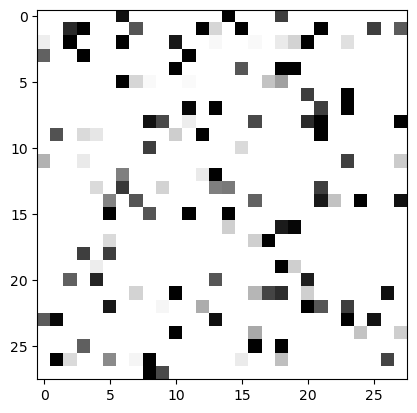

In [34]:
image,label = test_dataset[0] #to display the first image in test dataset along with its corresponding number
plt.imshow(image.numpy().squeeze(), cmap='gray_r');
print("\nThe Number is : " ,label,"\n")

In [35]:
print("Shape of image : ",image.shape)
print("Shape of label : ",label.shape)

Shape of image :  torch.Size([1, 28, 28])
Shape of label :  ()


In [36]:
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True) 
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)

In [37]:
# 28 * 28 = 784
input1 = 784 
# 2/3 of 784 = 523.6
hidden = 523
# Output = [0,1,2,3,4,5,6,7,8,9]
output = 10 

In [38]:
model = nn.Sequential(nn.Linear(input1, hidden), 
                       nn.LeakyReLU(), 
                       nn.Linear(hidden, output), 
                        nn.LogSoftmax(dim=1)) 
lossfn = nn.NLLLoss()
optimize = tch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 

In [39]:
time_start = time() 
epochs = 18 
for num in range(epochs): 
     run=0 
     for images, labels in train_loader: 
         images = images.view(images.shape[0], -1).to(dtype=tch.float32)  # Ensure the data type is consistent
         optimize.zero_grad() 
         output = model(images) 
         loss = lossfn(output, labels) 
         loss.backward() 
         optimize.step() 
         run += loss.item() 
     else: 
         print("Epoch Number : {} = Loss : {}".format(num, run/len(train_loader))) 
Elapsed=(time()-time_start)/60 
print("\nTraining Time (in minutes) : ",Elapsed) 

Epoch Number : 0 = Loss : nan
Epoch Number : 1 = Loss : nan
Epoch Number : 2 = Loss : nan
Epoch Number : 3 = Loss : nan
Epoch Number : 4 = Loss : nan
Epoch Number : 5 = Loss : nan
Epoch Number : 6 = Loss : nan
Epoch Number : 7 = Loss : nan
Epoch Number : 8 = Loss : nan
Epoch Number : 9 = Loss : nan
Epoch Number : 10 = Loss : nan
Epoch Number : 11 = Loss : nan
Epoch Number : 12 = Loss : nan
Epoch Number : 13 = Loss : nan
Epoch Number : 14 = Loss : nan
Epoch Number : 15 = Loss : nan
Epoch Number : 16 = Loss : nan
Epoch Number : 17 = Loss : nan

Training Time (in minutes) :  0.7667942841847738


In [40]:
correct=0
all = 0
for images,labels in test_dataset:
  img = images.view(1, 784).to(dtype=tch.float32)
  with tch.no_grad():
    logps = model(img)   
  ps = tch.exp(logps)
  probab = list(ps.numpy()[0])
  prediction = probab.index(max(probab))
  truth = labels
  if(truth == prediction):
    correct += 1
  all += 1

print("Number Of Images Tested : ", all)
print("Model Accuracy : ", (correct/all))

Number Of Images Tested :  11999
Model Accuracy :  0.099591632636053


Predicted Digit = 0


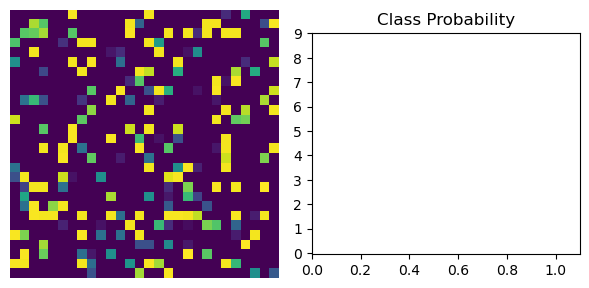

In [41]:
import numpy as np
def view_classify(img, ps):
    ps = ps.cpu().data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
img,label=train_dataset[np.random.randint(0,10001)] 
image=img.view(1, 784).to(dtype=tch.float32)
with tch.no_grad():
  logps = model(image)
ps = tch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(image.view(1, 28, 28), ps)

In [42]:
# Importing an image from the images folder
img = plt.imread('images/im-1.png')
image=img.view(1, 784).to(dtype=tch.float32)
with tch.no_grad():
  logps = model(image)
ps = tch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(image.view(1, 28, 28), ps)

ValueError: Type must be a sub-type of ndarray type